<a href="https://colab.research.google.com/github/Flaviofrc97/Data-Analysis/blob/main/analys_product_reviews_olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings( 'ignore' )
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (16,6)

In [ ]:
reviews = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
products  = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")
customers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")
orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")
orders_items = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
product_descr = pd.read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")
sellers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv")

##                                   **SCHEMA**
<img src="https://i.imgur.com/HRhd2Y0.png" width="900px" height="600px">

In [ ]:
reviews.set_index("order_id")
orders_items.set_index("order_id")

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
#Merging the datasets on common keys as shown in the above data schema.
data = customers.merge(orders, on = 'customer_id') \
                .merge(orders_items, on = 'order_id') \
                .merge(reviews, on = 'order_id') \
                .merge(products, on = 'product_id') 

columns = ['customer_id','customer_unique_id','order_id','product_id', 'order_item_id',
           'review_score','price', 'order_status','product_category_name']
data = data[columns].copy()
data.head()

,customer_id,customer_unique_id,order_id,product_id,order_item_id,review_score,price,order_status,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,1,4,124.99,delivered,moveis_escritorio
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,1,1,112.99,delivered,moveis_escritorio
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,2,1,112.99,delivered,moveis_escritorio
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,b1a5d5365d330d10485e0203d54ab9e8,a9516a079e37a9c9c36b9b78b10169e8,1,3,124.99,delivered,moveis_escritorio
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,2e604b3614664aa66867856dba7e61b7,a9516a079e37a9c9c36b9b78b10169e8,1,4,106.99,delivered,moveis_escritorio


In [ ]:
data['order_status'].value_counts()

delivered      110013
shipped          1110
canceled          529
invoiced          358
processing        352
unavailable         7
approved            3
Name: order_status, dtype: int64

### **TOTAL REVIEWS BY PRODUCT**

In [ ]:
total_votos = data\
            .groupby('product_id')[['product_id']]\
            .count()\
            .rename(columns = {'product_id': 'total_votos'})\
            .sort_values(by ="total_votos", ascending=False)
total_votos.head(10)

,total_votos
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,524
422879e10f46682990de24d770e7f83d,486
99a4788cb24856965c36a24e339b6058,482
389d119b48cf3043d311335e499d9c6b,391
368c6c730842d78016ad823897a372db,388
53759a2ecddad2bb87a079a1f1519f73,373
d1c427060a0f73f6b889a5c7c61f2ac4,340
53b36df67ebb7c41585e8d54d6772e08,320
154e7e31ebfa092203795c972e5804a6,292


### **MEAN REVIEWS BY PRODUCT**

In [ ]:
mean_reviews = data.groupby('product_id')[['review_score']]\
                    .mean()\
                    .rename(columns = {'review_score': 'media_votos'})\
                    .sort_values(by ="media_votos", ascending=False)
mean_reviews.head(10)

,media_votos
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
60314cbf527af04ebc935be7c02dc1cd,5.0
5fe23e6307c231e287f13c0a4be06c88,5.0
5fe490e61e7a37f2f0d1ad1771ac027d,5.0
c696cd2db7870be08c37822f7c0ef831,5.0
5fef486f2057e10fd91e167348812b7a,5.0
5ff4076c0f01eeba4f728c9e3fa2653c,5.0
5ff59c5f2db7600fa8143442c8b1e4f6,5.0
c68b419d9c6038271b85bac98adb0fc9,5.0


In [ ]:
mean_price = data.groupby('product_id')[['price']]\
                    .mean()\
                    .rename(columns = {'price': 'media_preco'})\
                    .sort_values(by ="media_preco", ascending=False)
mean_price.head(10)

,media_preco
product_id,
489ae2aa008f021502940f251d4cce7f,6735.00
1bdf5e6731585cf01aa8169c7028d6ad,6499.00
a6492cc69376c469ab6f61d8f44de961,4799.00
c3ed642d592594bb648ff4a04cee2747,4690.00
259037a6a41845e455183f89c5035f18,4590.00
a1beef8f3992dbd4cd8726796aa69c53,4399.87
6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
6902c1962dd19d540807d0ab8fade5c6,3999.90
4ca7b91a31637bd24fb8e559d5e015e4,3999.00


In [ ]:
data_product = data[['product_id']] # New df to keep the agruped columns 
data_product.drop_duplicates(inplace = True)
data_product.set_index("product_id", inplace = True)

data_product['total_reviews'] = total_votos
data_product['mean_reviews']  = mean_reviews
data_product['avg_price']     = mean_price

data_product.head()

,total_reviews,mean_reviews,avg_price
product_id,,,
a9516a079e37a9c9c36b9b78b10169e8,59,3.423729,119.362881
4aa6014eceb682077f9dc4bffebc05b0,46,4.347826,291.885000
bd07b66896d6f1494f5b86251848ced7,10,3.800000,143.958000
a5647c44af977b148e0a3a4751a09e2e,20,3.600000,165.497000
9391a573abe00141c56e38d84d7d5b3b,4,3.250000,230.000000


### **DIST AVAREGE REVIEWS**

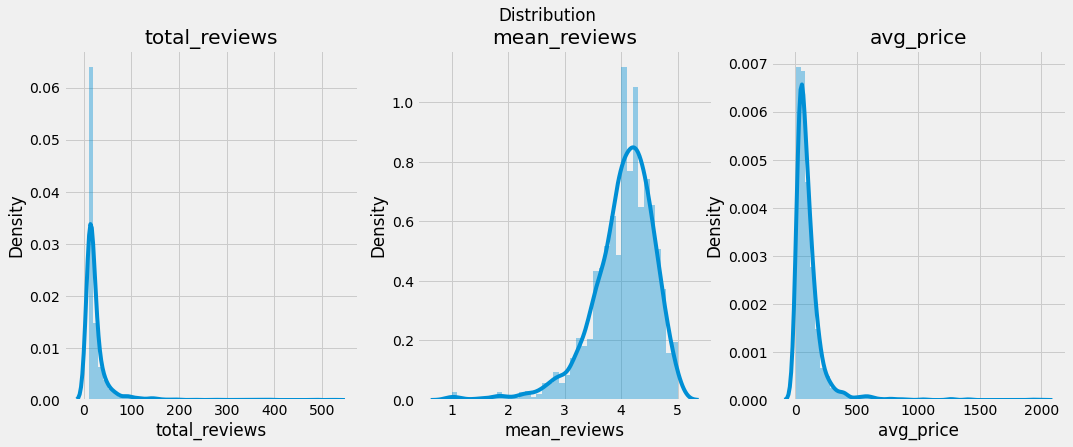

In [ ]:
plt.suptitle("Distribution")
for i, feat in enumerate(data_product[['total_reviews','mean_reviews','avg_price']]):
    plt.subplot(1,len(data_product[['total_reviews','mean_reviews','avg_price']].columns),i+1)
    sns.distplot(data_product[feat])
    plt.title(f"{feat}")

### Nós temos muitos votos com média igual a 5, o que é estranho uma vez que, com muitas pessoas votando, esse media deveria se diluir. 
### A menos que não tenha tido muitos votos. Vamos checar?

In [ ]:
min_qt_votos = min(data_product.query("mean_reviews == 5")['total_reviews'])
max_qt_votos = max(data_product.query("mean_reviews == 5")['total_reviews'])

print(f"voto minimo para produtos com media igual a 5: {min_qt_votos}")
print(f"voto maximo para produtos com media igual a 5: {max_qt_votos}")

voto minimo para produtos com media igual a 5: 1
voto maximo para produtos com media igual a 5: 15


#### Os produtos com médias iguais a 5 tiveram poucos votos, o que faz com que essa média seja alta.

## **DEFININDO LIMITE DE VOTOS.**
#### Defini um limite de votos para os produtos, com inituito de evitar que produtos com poucos votos se sobresaiam com médias altas.

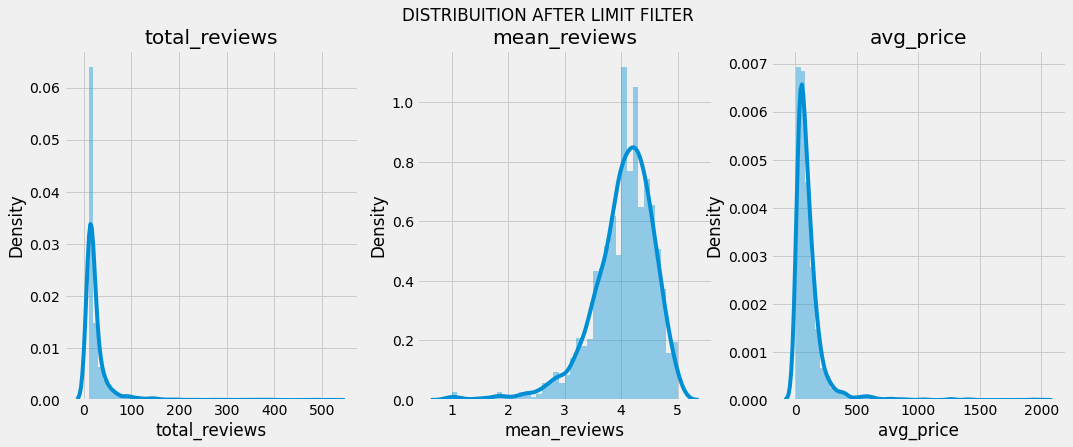

In [ ]:
limit_total_review = 10
data_product = data_product[data_product.total_reviews >= limit_total_review ].copy()

plt.suptitle("DISTRIBUITION AFTER LIMIT FILTER")
for i, feat in enumerate(data_product[['total_reviews','mean_reviews','avg_price']]):
    plt.subplot(1,len(data_product[['total_reviews','mean_reviews','avg_price']].columns),i+1)
    sns.distplot(data_product[feat])
    plt.title(f"{feat}")

# **REVIEWS BY ORDER STATUS**

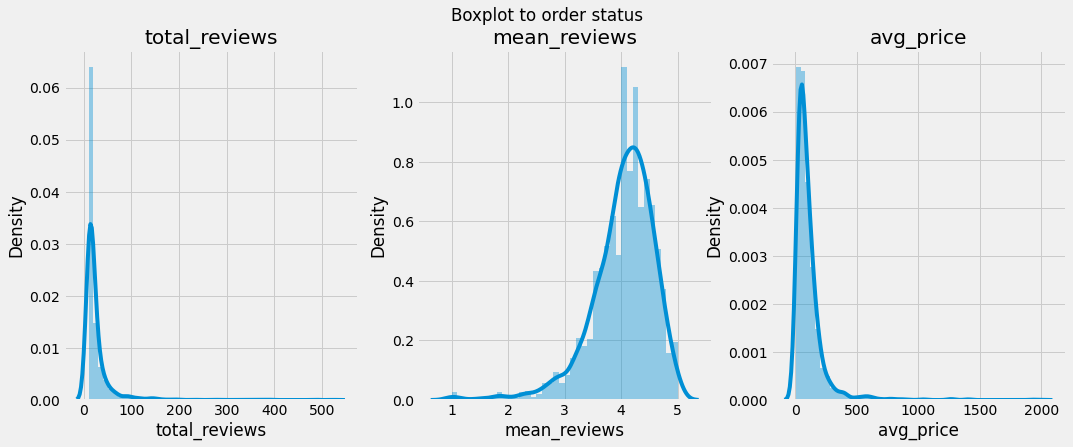

In [ ]:
plt.suptitle("Boxplot to order status")
for i, feat in enumerate(data_product):
    plt.subplot(1,len(data_product.columns),i+1)
    sns.boxpot(data_product[feat])
    plt.title(f"{feat}")